In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

In [ ]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [ ]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [ ]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [ ]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [ ]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [ ]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [ ]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


# Q1

## (a)

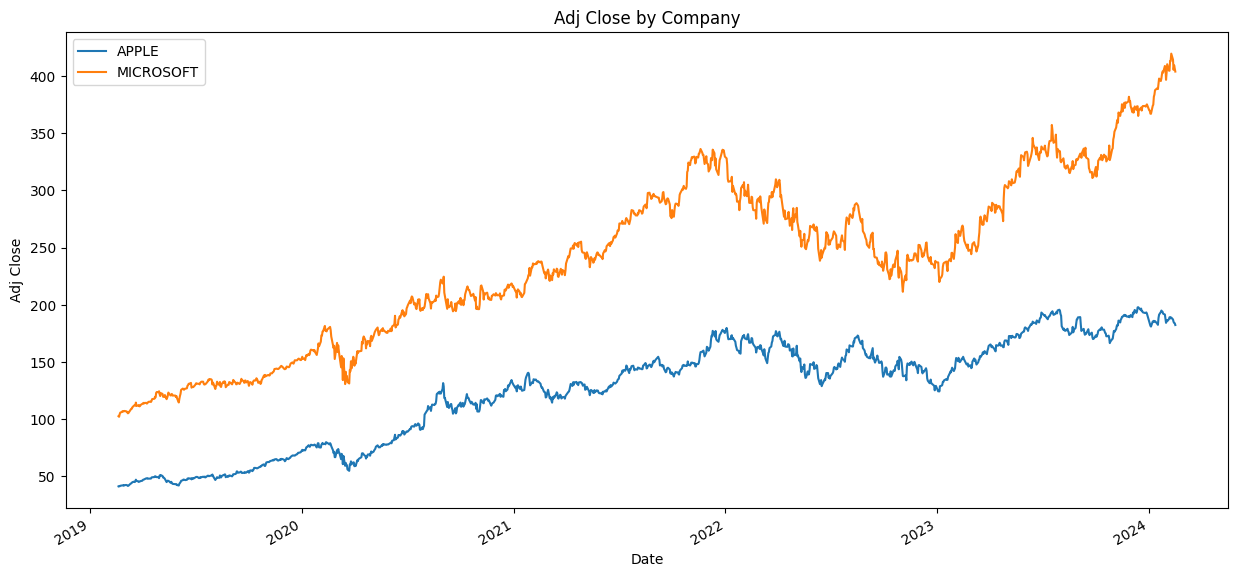

In [ ]:
# Plot the time series of Microsoft and Apple stock prices on the same plot

## YOUR CODE STARTS HERE
def plot_col_by_company_group(df, col_name):
    fig, ax = plt.subplots()
    for name, group in df.groupby('company_name'):
        group.plot(ax=ax, y=col_name, label=name, title=f"{col_name} by Company", xlabel="Date", ylabel=col_name, figsize=(15,7))
plot_col_by_company_group(stocks_df, 'Adj Close')


**Enter answer here:** Over time there is an upward trend for both companies. Microsoft prices are higher than Apple prices.


## (b)

In [ ]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
stocks_weekly = microsoft_df.resample('W').mean()
stocks_monthly =  microsoft_df.resample('M').mean()
stocks_quarterly =  microsoft_df.resample('Q').mean()
stocks_semi_annually =  microsoft_df.resample('6M').mean()
stocks_annually =  microsoft_df.resample('A').mean()


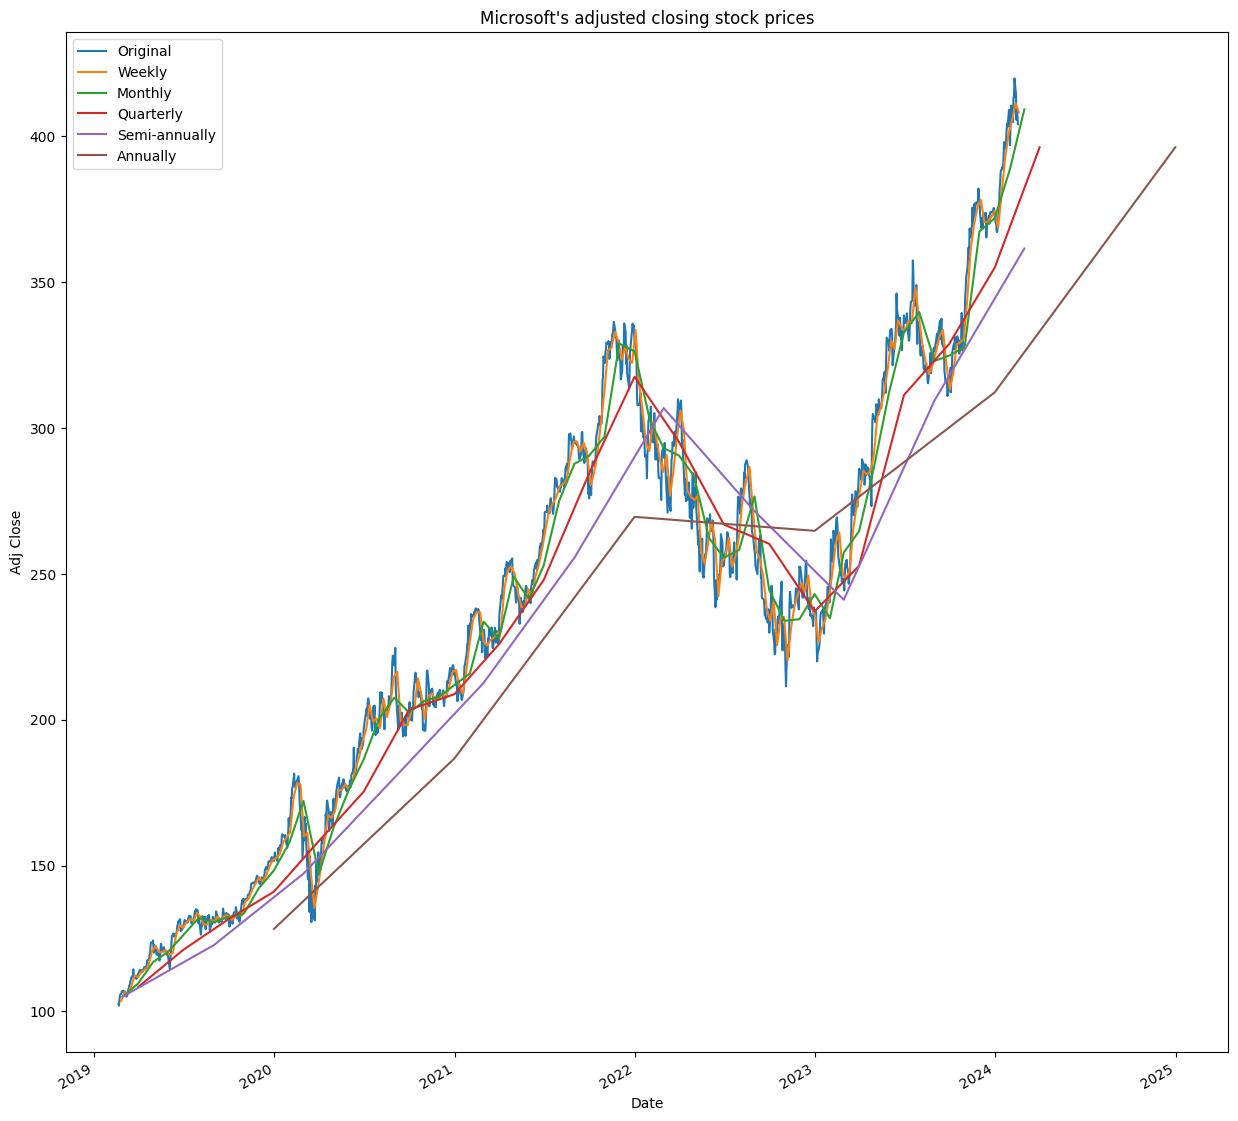

In [ ]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE


fig, ax = plt.subplots( figsize=(15,15))
microsoft_df.plot(ax=ax, y='Adj Close', label='Original', title=f"{'MICROSOFT'} Adj Close", xlabel="Date", ylabel="Adj Close")
stocks_weekly.plot(ax=ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
stocks_monthly.plot( ax=ax,y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
stocks_quarterly.plot(ax=ax,y='Adj Close', label='Quarterly', xlabel="Date", ylabel="Adj Close")
stocks_semi_annually.plot( ax=ax,y='Adj Close', label='Semi-annually', xlabel="Date", ylabel="Adj Close")
stocks_annually.plot( ax=ax,y='Adj Close', label='Annually', xlabel="Date", ylabel="Adj Close")
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close")
ax.set_title("Microsoft's adjusted closing stock prices")
plt.show()

In [ ]:
# Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
stocks_weeklya = apple_df.resample('W').mean()
stocks_monthlya =  apple_df.resample('M').mean()
stocks_quarterlya =  apple_df.resample('Q').mean()
stocks_semi_annuallya =  apple_df.resample('6M').mean()
stocks_annuallya =  apple_df.resample('A').mean()

Text(0.5, 1.0, "Apple's adjusted closing stock prices")

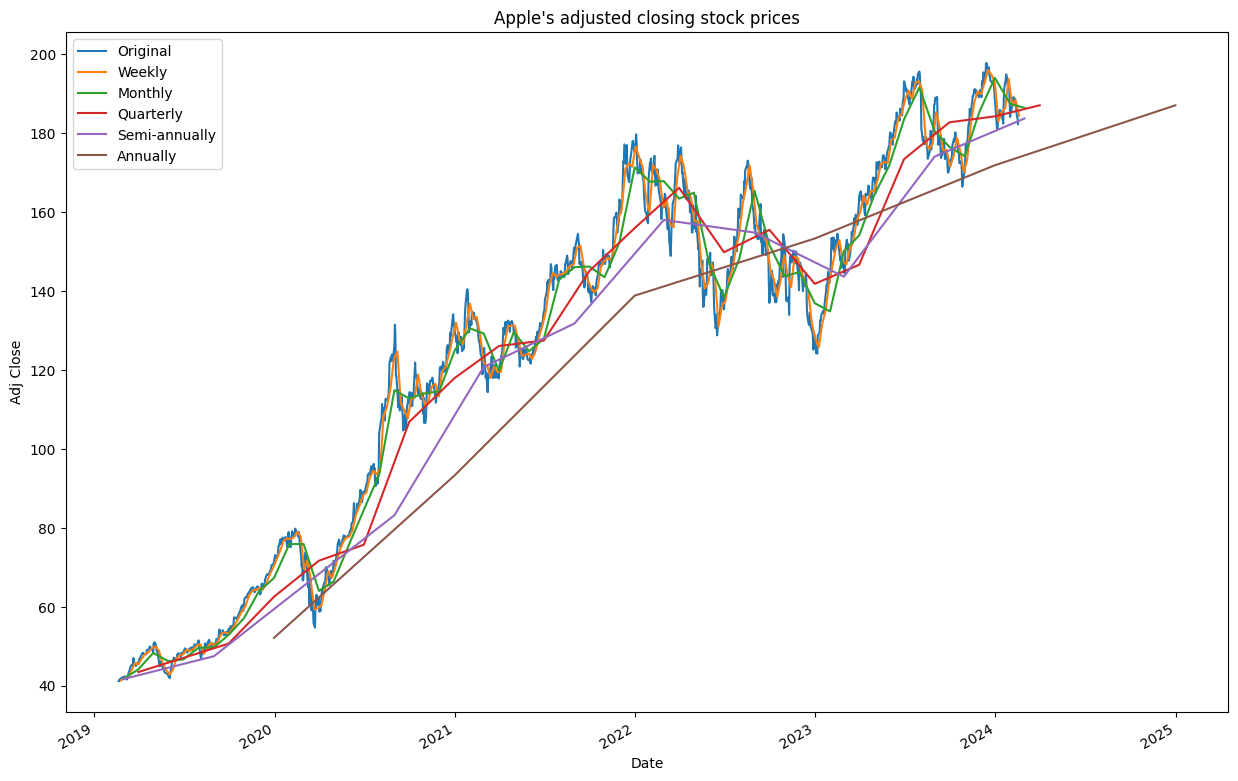

In [ ]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE
fig, ax = plt.subplots( figsize=(15,10))
apple_df.plot(ax=ax, y='Adj Close', label='Original', title=f"{'MICROSOFT'} Adj Close", xlabel="Date", ylabel="Adj Close")
stocks_weeklya.plot(ax=ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
stocks_monthlya.plot( ax=ax,y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
stocks_quarterlya.plot(ax=ax,y='Adj Close', label='Quarterly', xlabel="Date", ylabel="Adj Close")
stocks_semi_annuallya.plot( ax=ax,y='Adj Close', label='Semi-annually', xlabel="Date", ylabel="Adj Close")
stocks_annuallya.plot( ax=ax,y='Adj Close', label='Annually', xlabel="Date", ylabel="Adj Close")
#ax.set_xlabel("Date")
#ax.set_ylabel("Adj Close")
ax.set_title("Apple's adjusted closing stock prices")
#plt.show()

## (c)

**Enter answer here:**One con of downsampling is losing some data as you adjust the time-scale from higher to lower frequency. One pro is that it can make data easier for us to read and see trends. Monthly time-scale is probably the most appropriate time-scale to downsample.



# Q2

## (a)

In [ ]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

## YOUR CODE STARTS HERE
stocks_monthly['monthly_return'] = stocks_monthly['Adj Close'].pct_change()
stocks_monthly.head()

,Adj Close,monthly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [ ]:
# Do the same for the monthly downsampled Apple dataframe

## YOUR CODE STARTS HERE
stocks_monthlya['monthly_return'] = stocks_monthlya['Adj Close'].pct_change()
stocks_monthlya.head()

,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


**Enter answer here:** The first entry is NaN as there is no closing price from the previous month as that is the first month we are starting with.


## (b)

Text(0.5, 1.0, 'Monthly return rate of Microsoft and Apple stocks')

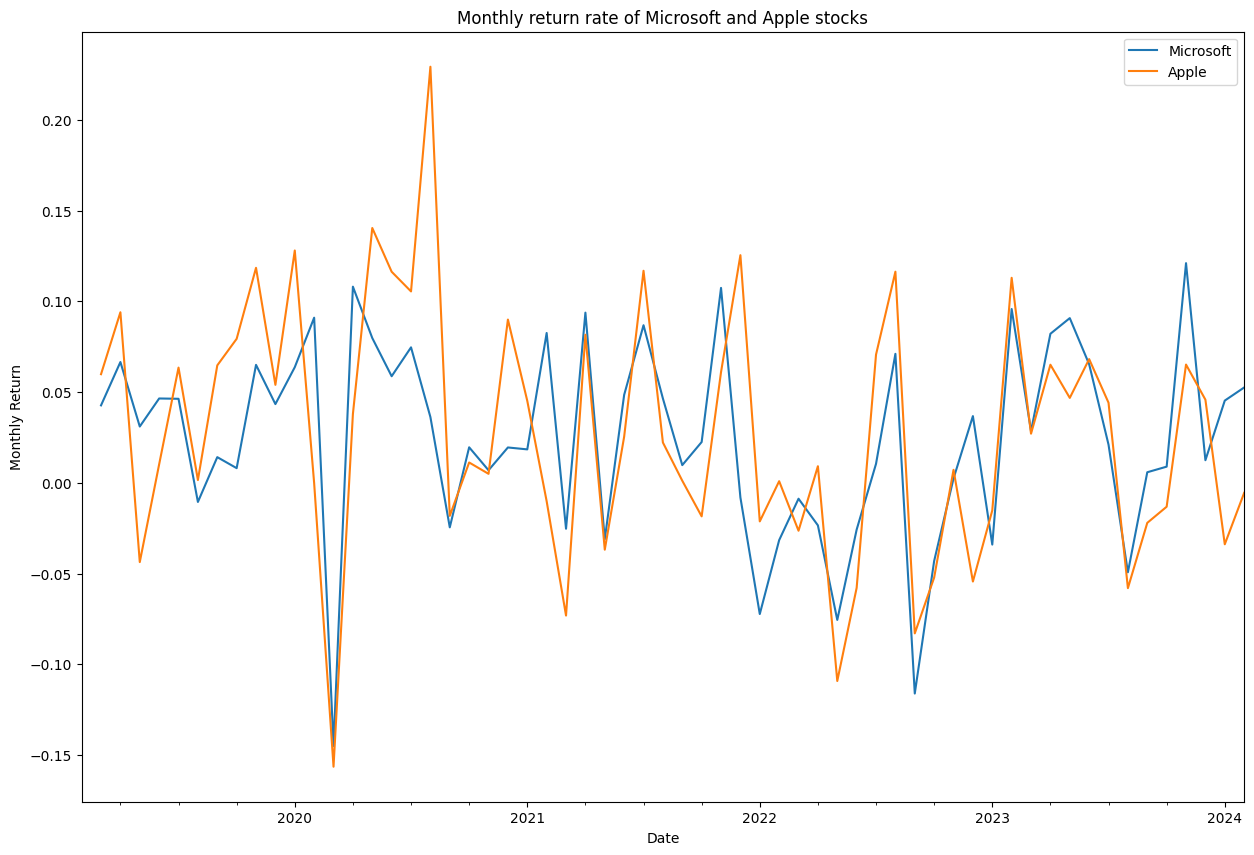

In [ ]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

## YOUR CODE STARTS HERE
fig, ax = plt.subplots( figsize=(15,10))
stocks_monthly.plot(ax=ax, y='monthly_return', label='Microsoft',  xlabel="Date", ylabel='Monthly Return')
stocks_monthlya.plot(ax=ax, y='monthly_return', label='Apple', xlabel="Date", ylabel="Monthly Return")
ax.set_title("Monthly return rate of Microsoft and Apple stocks")




**Enter answer here:** The monthly returns typically fluctuate, but between 2020 and 2021 there is a major discrepency between Apple and Microsoft where monthly prices of Apple jump which is not obvious in 1a).
There is also a major dip in both Apple and Microsoft monthly returns that is not obvious in 1(a).



# Q3

## (a)

In [ ]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE
stocks_exp_01 = stocks_monthly.ewm(alpha=0.1, adjust=False).mean()
stocks_exp_03 = stocks_monthly.ewm(alpha=0.3, adjust=False).mean()
stocks_exp_05 = stocks_monthly.ewm(alpha=0.5, adjust=False).mean()
stocks_exp_07 = stocks_monthly.ewm(alpha=0.7, adjust=False).mean()
stocks_exp_09 = stocks_monthly.ewm(alpha=0.9, adjust=False).mean()

Text(0.5, 1.0, 'Monthly downsampled Microsoft df with exponential smoothing')

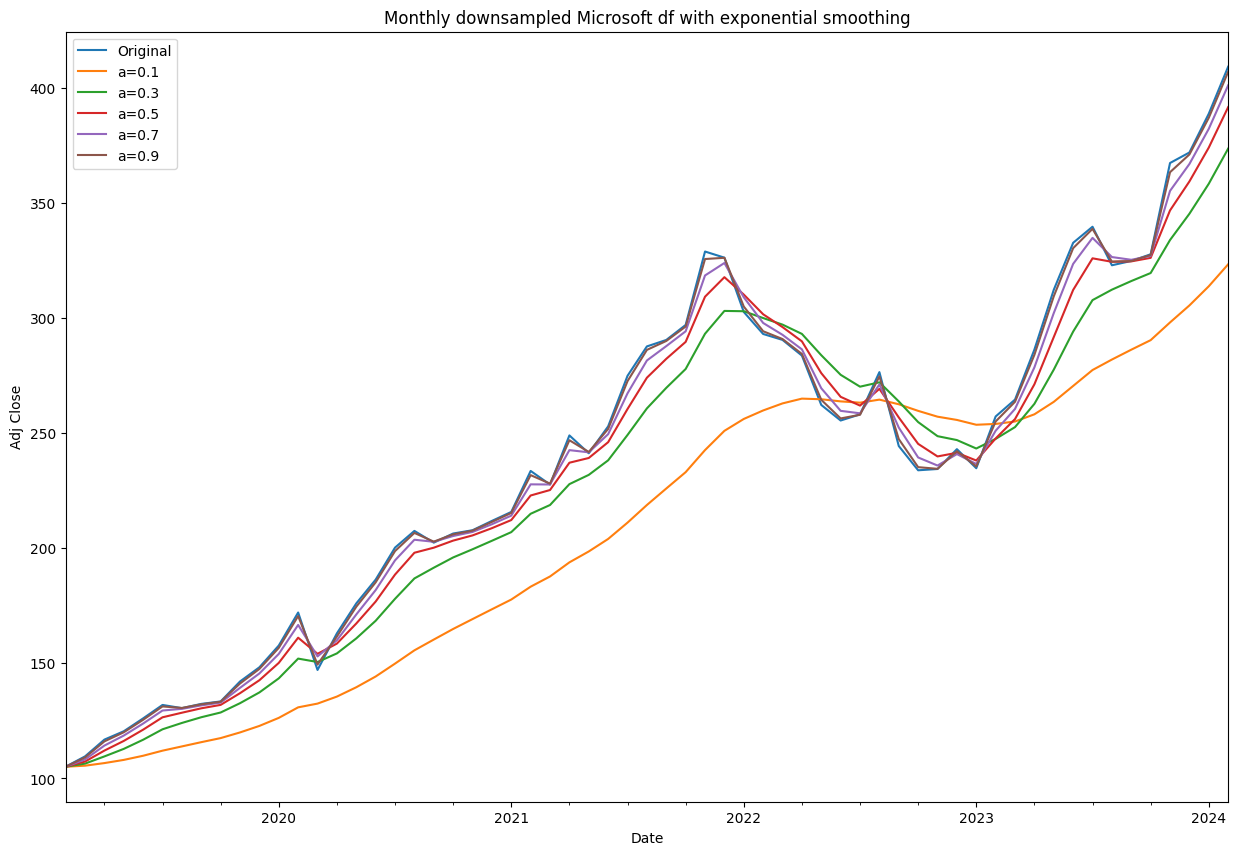

In [ ]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (6 lines)

## YOUR CODE STARTS HERE
# Plot original and exponential smoothed Adj Close by company on same subplot
fig, ax = plt.subplots( figsize=(15,10))
stocks_monthly.plot(ax=ax, y='Adj Close', label='Original', title=f"{'MICROSOFT'} Adj Close", xlabel="Date", ylabel="Adj Close")
stocks_exp_01.plot(ax=ax, y='Adj Close', label='a=0.1', xlabel="Date", ylabel="Adj Close")
stocks_exp_03.plot( ax=ax,y='Adj Close', label='a=0.3', xlabel="Date", ylabel="Adj Close")
stocks_exp_05.plot(ax=ax,y='Adj Close', label='a=0.5', xlabel="Date", ylabel="Adj Close")
stocks_exp_07.plot( ax=ax,y='Adj Close', label='a=0.7', xlabel="Date", ylabel="Adj Close")
stocks_exp_09.plot( ax=ax,y='Adj Close', label='a=0.9', xlabel="Date", ylabel="Adj Close")
ax.set_title("Monthly downsampled Microsoft df with exponential smoothing")


In [ ]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE
stocks_exp_01 = stocks_monthlya.ewm(alpha=0.1, adjust=False).mean()
stocks_exp_03 = stocks_monthlya.ewm(alpha=0.3, adjust=False).mean()
stocks_exp_05 = stocks_monthlya.ewm(alpha=0.5, adjust=False).mean()
stocks_exp_07 = stocks_monthlya.ewm(alpha=0.7, adjust=False).mean()
stocks_exp_09 = stocks_monthlya.ewm(alpha=0.9, adjust=False).mean()

Text(0.5, 1.0, 'Monthly downsampled Apple df with exponential smoothing')

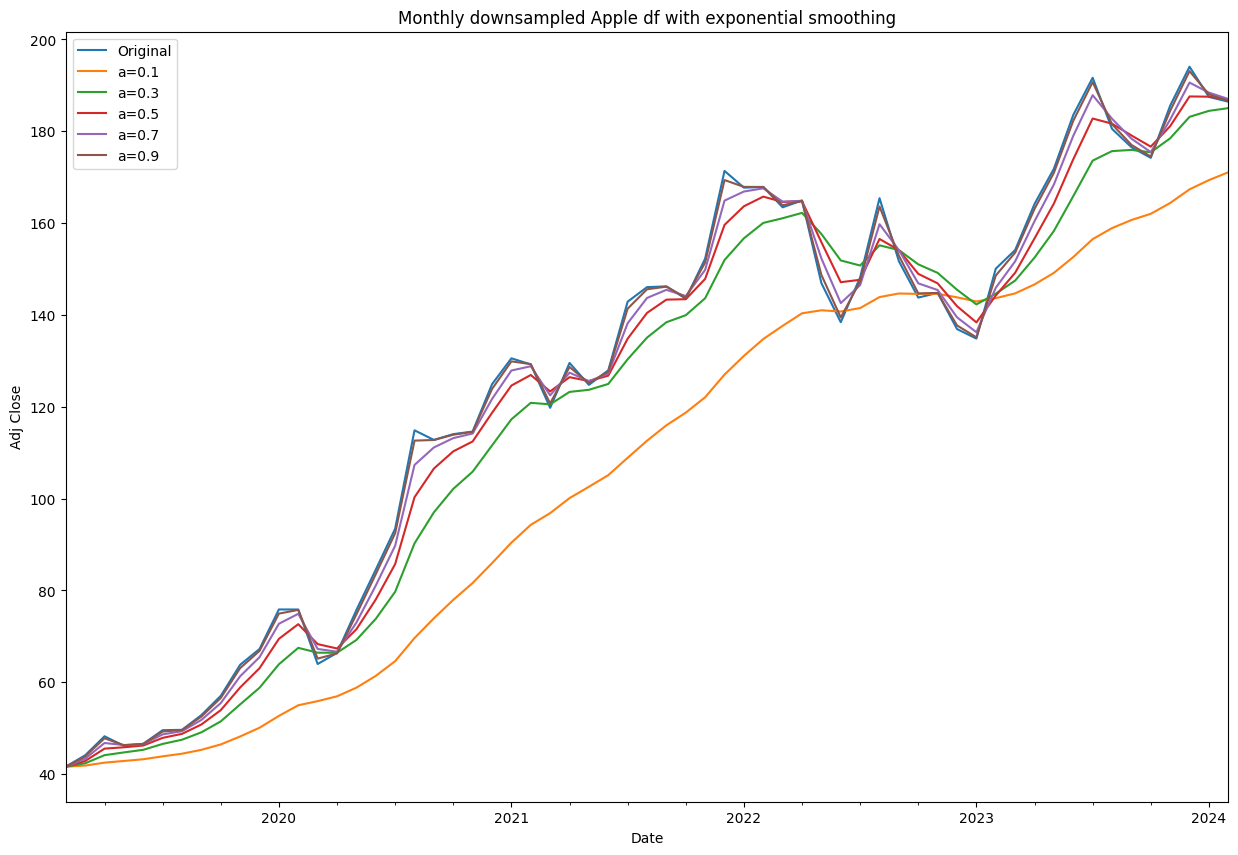

In [ ]:
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (6 lines)

## YOUR CODE STARTS HERE
fig, ax = plt.subplots( figsize=(15,10))
stocks_monthlya.plot(ax=ax, y='Adj Close', label='Original', title=f"{'APPLE'} Adj Close", xlabel="Date", ylabel="Adj Close")
stocks_exp_01.plot(ax=ax, y='Adj Close', label='a=0.1', xlabel="Date", ylabel="Adj Close")
stocks_exp_03.plot( ax=ax,y='Adj Close', label='a=0.3', xlabel="Date", ylabel="Adj Close")
stocks_exp_05.plot(ax=ax,y='Adj Close', label='a=0.5', xlabel="Date", ylabel="Adj Close")
stocks_exp_07.plot( ax=ax,y='Adj Close', label='a=0.7', xlabel="Date", ylabel="Adj Close")
stocks_exp_09.plot( ax=ax,y='Adj Close', label='a=0.9', xlabel="Date", ylabel="Adj Close")
ax.set_title("Monthly downsampled Apple df with exponential smoothing")

## (b)

**Enter your answer here:** The smaller alpha is the more smoothing is applied.


# Q4

## (a)

<Axes: title={'center': 'Edmonton Temperature'}, xlabel='Date', ylabel='Temperature'>

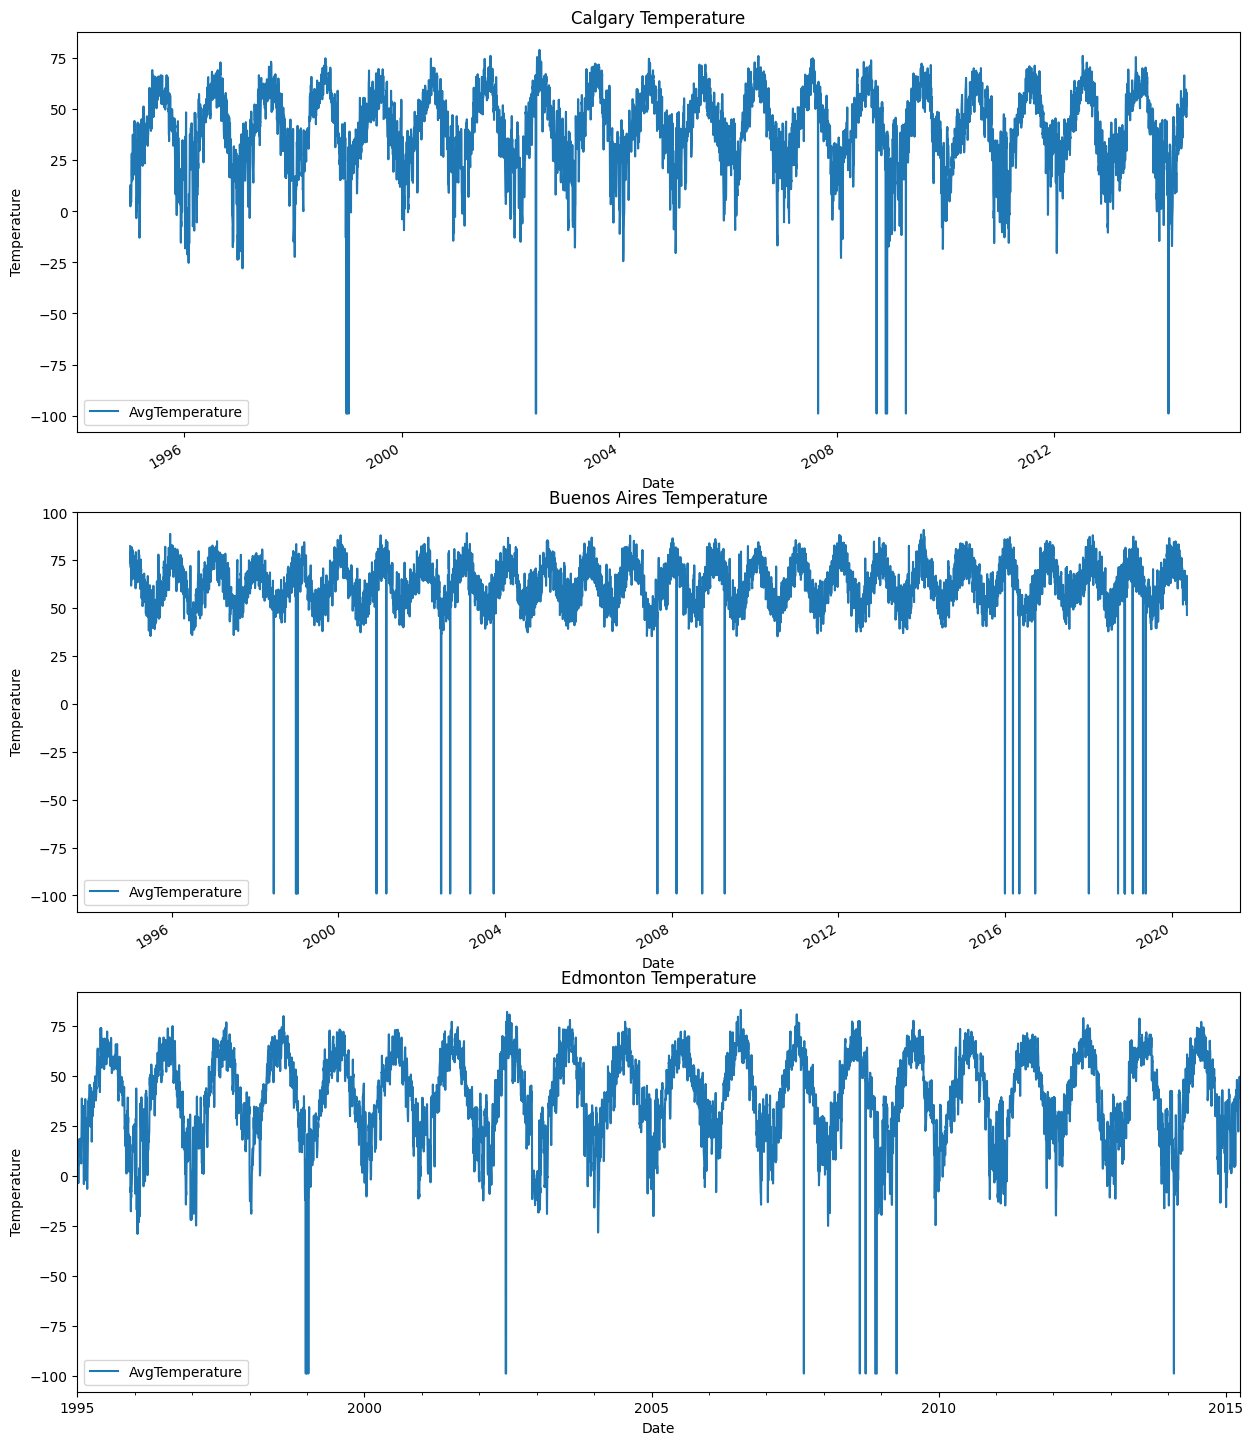

In [ ]:
# Plot temperature data for each city in different subplots

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_df.plot(ax=ax[0], title=f"{city_1} Temperature", xlabel="Date", ylabel="Temperature")
city_2_df.plot(ax=ax[1], title=f"{city_2} Temperature", xlabel="Date", ylabel="Temperature")
city_3_df.plot(ax=ax[2], title=f"{city_3} Temperature", xlabel="Date", ylabel="Temperature")

**Enter answer here:** All three cities do not have records for all the same dates (ie. Calgary has no records for 2019 and Buenos Aires does). There are also many instances where the average temperature is at -100 which is unrealistic.

## (b)

In [ ]:
# Remove entries that aren't in intersection of all three indices (which are dates)

## YOUR CODE STARTS HERE
index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]

In [ ]:
# Downsample the data to monthly

## YOUR CODE STARTS HERE
city_1_monthly = city_1_df.resample('M').mean()
city_2_monthly = city_2_df.resample('M').mean()
city_3_monthly = city_3_df.resample('M').mean()

In [ ]:
# Apply exponential smoothing to temperature data with alpha = 0.3

## YOUR CODE STARTS HERE
city_1_monthly = city_1_monthly.ewm(alpha=0.3, adjust=False).mean()
city_2_monthly = city_2_monthly.ewm(alpha=0.3, adjust=False).mean()
city_3_monthly = city_3_monthly.ewm(alpha=0.3, adjust=False).mean()

<Axes: title={'center': 'Edmonton Monthly Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

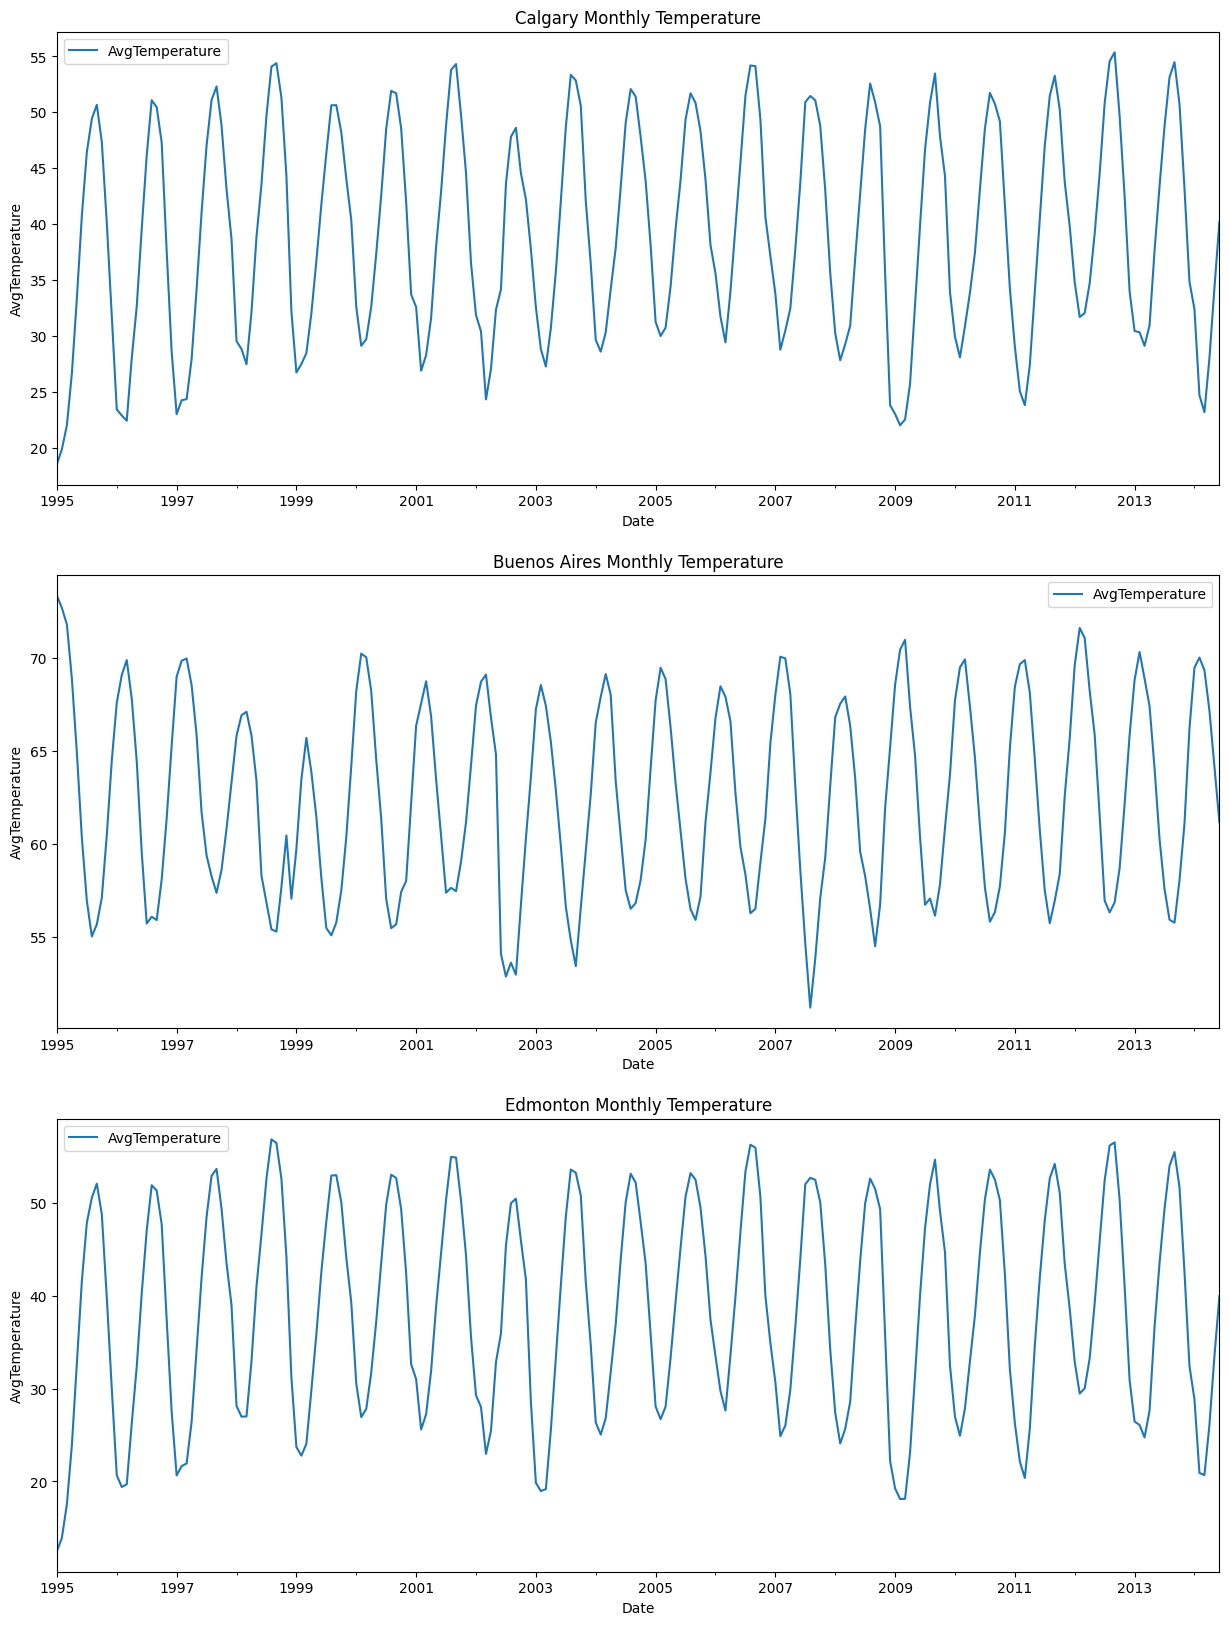

In [ ]:
# Plot monthly smoothed temperature data for cities in different subplots

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_monthly.plot(ax=ax[0], y='AvgTemperature', title=f"{city_1} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_2_monthly.plot(ax=ax[1], y='AvgTemperature', title=f"{city_2} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_3_monthly.plot(ax=ax[2], y='AvgTemperature', title=f"{city_3} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:** The graphs are oscillating and I would expect that Calgary and Edmonton would have similar graphs because they are in the same province and would have more close weather records.



## (c)

Text(0, 0.5, 'Correlation')

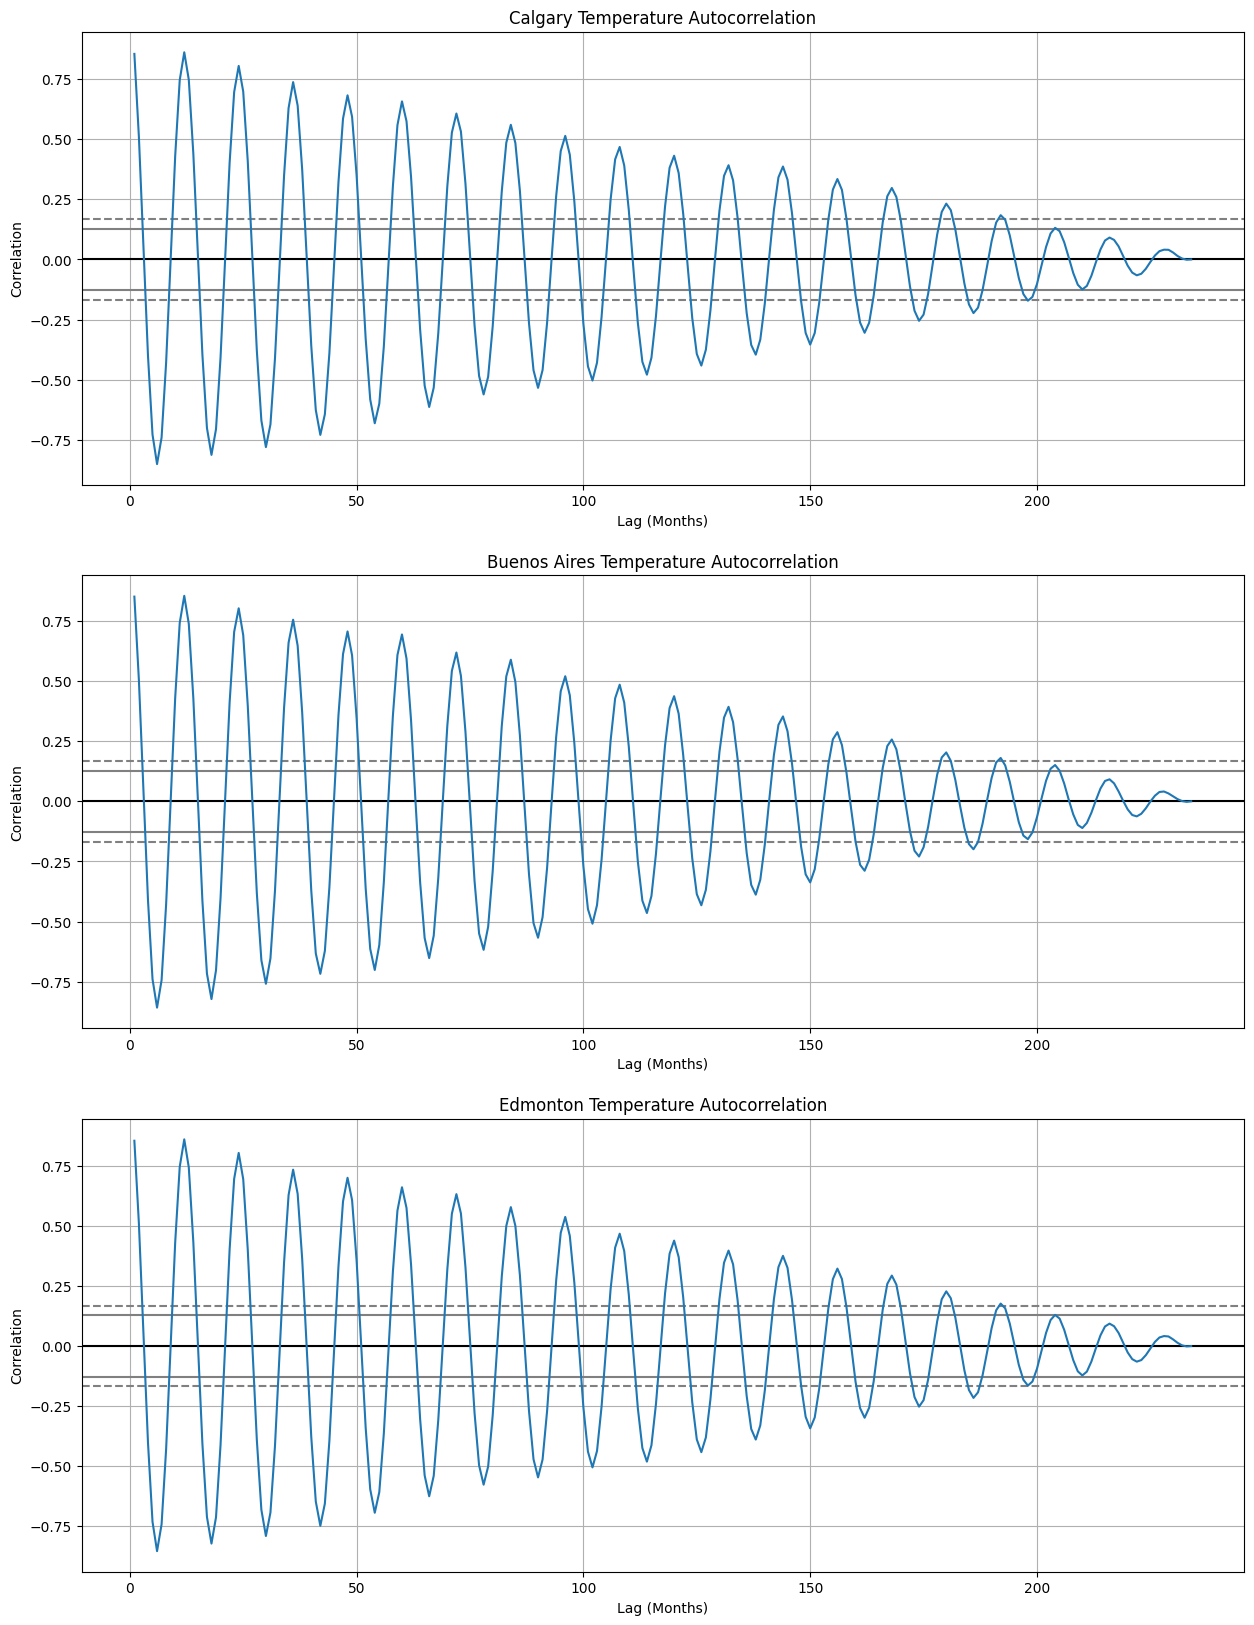

In [ ]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

pd.plotting.autocorrelation_plot(city_1_monthly['AvgTemperature'], ax=ax[0])
ax[0].set_title(f"{city_1} Temperature Autocorrelation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_2_monthly['AvgTemperature'], ax=ax[1])
ax[1].set_title(f"{city_2} Temperature Autocorrelation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_3_monthly['AvgTemperature'], ax=ax[2])
ax[2].set_title(f"{city_3} Temperature Autocorrelation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")

**Enter answer here:** I think that the autocorrelation confirms the ocsillating pattern observed in 4(b). In general, as lag increases correlation decreases and the plots go from high positive/negative correlations to low positive/negative correlations approaching 0.

## (d)

Text(0, 0.5, 'Correlation')

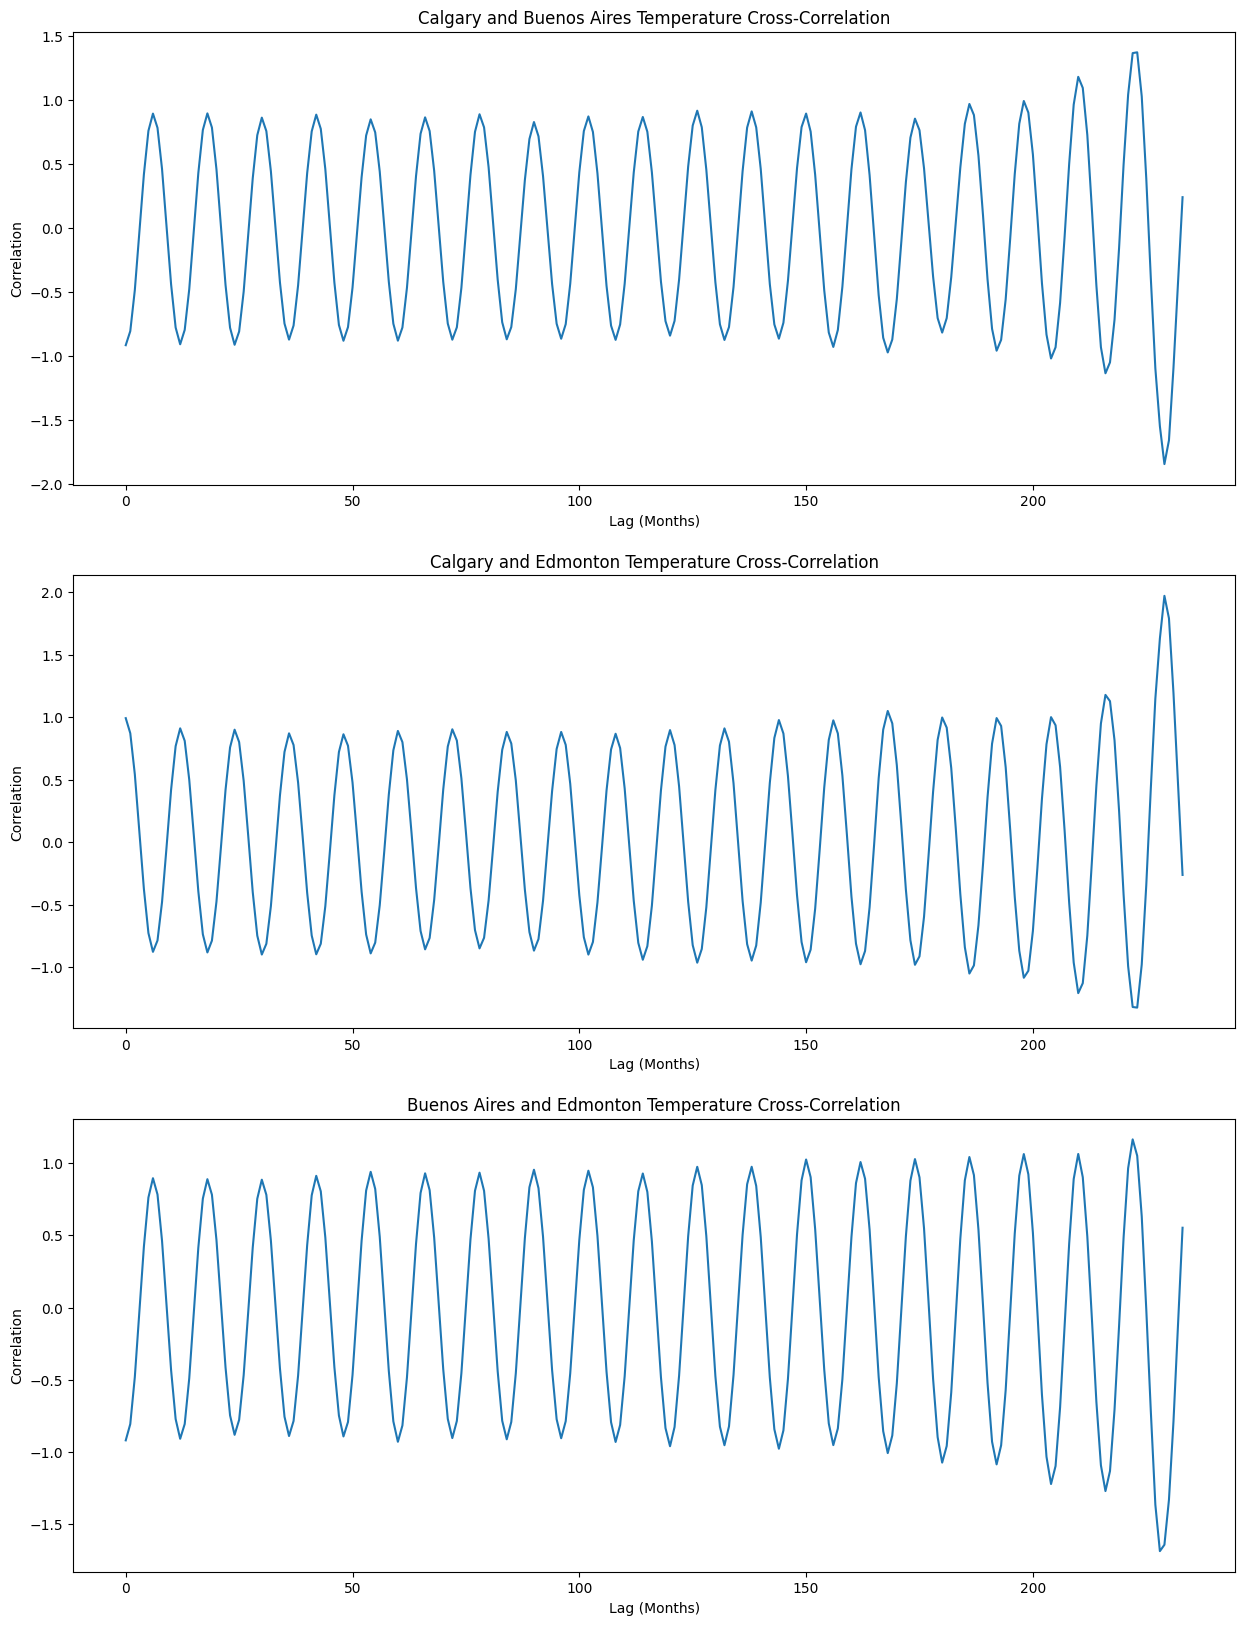

In [ ]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

ccf_12 = ccf(city_1_monthly['AvgTemperature'], city_2_monthly['AvgTemperature'])
ccf_13 = ccf(city_1_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])
ccf_23 = ccf(city_2_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])

ax[0].plot(ccf_12)
ax[0].set_title(f"{city_1} and {city_2} Temperature Cross-Correlation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

ax[1].plot(ccf_13)
ax[1].set_title(f"{city_1} and {city_3} Temperature Cross-Correlation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

ax[2].plot(ccf_23)
ax[2].set_title(f"{city_2} and {city_3} Temperature Cross-Correlation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")

**Enter answer here:** Looking at lag = 0, for the Edmonton-Buenos Aires cross-correlation plot the correlation is approximately negative 1 which means they have opposite seasons. When it is summer in Edmonton it is likely winter in Buenos Aires. Looking at lag = 0 again, for the Edmonton-Calgary cross-correlation plot the correlation is approximately positive 1 which means they have same seasons. When it is summer in Edmonton it is  also summer in Calgary.